In [1]:
from matplotlib import image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from itertools import chain

In [4]:
import sys
sys.path.insert(0, os.getenv('lib_path'))

In [5]:
import breast_segment

In [6]:
filenames_dict = {}
classes = ['1','2','3','4']
subsets = ['train','valid','test']
folder = 'ddsm_four_classes'

In [7]:
filenames_paths = {}
filenames_dict = {}
for density_class in classes:
    filenames_dict[density_class] = []
    filenames_paths[density_class] = {}
    for subset in subsets:
        files = os.listdir(
            os.path.join(os.getenv('data_path'),'baza_student_raw',folder,subset,density_class)
        )
        files_filled = [x.zfill(14) for x in files if x.endswith('.png')]
        filenames_dict[density_class] +=files_filled
        for file in files:
            filenames_paths[file] = os.path.join(os.getenv('data_path'),'baza_student_raw',folder,subset,density_class, file)
for key, value in filenames_dict.items():
    value.sort()

In [8]:
filenames_paths

{'1': {},
 '6250_DDSM.png': '/Users/krystianzielinski/Documents/repos/federated_learning_demo/data/baza_student_raw/ddsm_four_classes/train/1/6250_DDSM.png',
 '7099_DDSM.png': '/Users/krystianzielinski/Documents/repos/federated_learning_demo/data/baza_student_raw/ddsm_four_classes/train/1/7099_DDSM.png',
 '280_DDSM.png': '/Users/krystianzielinski/Documents/repos/federated_learning_demo/data/baza_student_raw/ddsm_four_classes/train/1/280_DDSM.png',
 '3934_DDSM.png': '/Users/krystianzielinski/Documents/repos/federated_learning_demo/data/baza_student_raw/ddsm_four_classes/train/1/3934_DDSM.png',
 '8341_DDSM.png': '/Users/krystianzielinski/Documents/repos/federated_learning_demo/data/baza_student_raw/ddsm_four_classes/train/1/8341_DDSM.png',
 '1299_DDSM.png': '/Users/krystianzielinski/Documents/repos/federated_learning_demo/data/baza_student_raw/ddsm_four_classes/train/1/1299_DDSM.png',
 '1298_DDSM.png': '/Users/krystianzielinski/Documents/repos/federated_learning_demo/data/baza_student_ra

In [9]:
exceptions = ['00500_DDSM.png', '00501_DDSM.png', '00502_DDSM.png', '01199_DDSM.png',
'01200_DDSM.png', '01201_DDSM.png', '02594_DDSM.png', '02595_DDSM.png',
'02620_DDSM.png', '02621_DDSM.png', '02622_DDSM.png', '02719_DDSM.png',
'02720_DDSM.png', '02721_DDSM.png', '03658_DDSM.png', '03659_DDSM.png',
'03660_DDSM.png', '06533_DDSM.png', '06534_DDSM.png', '06535_DDSM.png',
'07780_DDSM.png', '07781_DDSM.png']

In [10]:
patients_ids_class = {}
patient_id = 0
exceptions_iter = 0
for density_class, filenames in filenames_dict.items():
    file_ids = 0
    while file_ids<(filenames.__len__()):
        if filenames[file_ids] in exceptions:
            patients_ids_class[filenames[file_ids]] = {'patient_id':1000000+exceptions_iter, 'density':density_class}

            exceptions_iter +=1
            file_ids+=1
            
        elif (abs(int(filenames[file_ids][:5]) - int(filenames[file_ids+3][:5]))==3):
            for i in range(4):
                filename = filenames[file_ids]
                patients_ids_class[filenames[file_ids]] = {'patient_id':patient_id, 'density':density_class}
                
                file_ids+=1
        else:
            for i in range(1):
                filename = filenames[file_ids]
                patients_ids_class[filenames[file_ids]] = {'patient_id':patient_id, 'density':density_class}
                
                file_ids+=1

        patient_id +=1

In [11]:
patients_ids_class_df = pd.DataFrame.from_dict(patients_ids_class).T

In [12]:
patients_ids_class_df.loc[np.isin(patients_ids_class_df.index,exceptions)]

,patient_id,density
01199_DDSM.png,1000000,1
01200_DDSM.png,1000001,1
01201_DDSM.png,1000002,1
06533_DDSM.png,1000003,1
06534_DDSM.png,1000004,1
06535_DDSM.png,1000005,1
00500_DDSM.png,1000006,2
00501_DDSM.png,1000007,2
00502_DDSM.png,1000008,2
02620_DDSM.png,1000009,2


In [13]:
counter = patients_ids_class_df.groupby('patient_id').count()

In [14]:
patients_ids_class_df.loc[np.isin(patients_ids_class_df.patient_id,counter.loc[counter.density<4].index)].sort_index()

,patient_id,density
00500_DDSM.png,1000006,2
00501_DDSM.png,1000007,2
00502_DDSM.png,1000008,2
01199_DDSM.png,1000000,1
01200_DDSM.png,1000001,1
01201_DDSM.png,1000002,1
02594_DDSM.png,1000020,3
02595_DDSM.png,1000021,3
02620_DDSM.png,1000009,2
02621_DDSM.png,1000010,2


In [15]:
patients_ids_class_df.loc[np.isin(patients_ids_class_df.patient_id,counter.loc[counter.density<4].index)].sort_index().index

Index(['00500_DDSM.png', '00501_DDSM.png', '00502_DDSM.png', '01199_DDSM.png',
       '01200_DDSM.png', '01201_DDSM.png', '02594_DDSM.png', '02595_DDSM.png',
       '02620_DDSM.png', '02621_DDSM.png', '02622_DDSM.png', '02719_DDSM.png',
       '02720_DDSM.png', '02721_DDSM.png', '03658_DDSM.png', '03659_DDSM.png',
       '03660_DDSM.png', '06533_DDSM.png', '06534_DDSM.png', '06535_DDSM.png',
       '07780_DDSM.png', '07781_DDSM.png'],
      dtype='object')

In [16]:
print(exceptions)

['00500_DDSM.png', '00501_DDSM.png', '00502_DDSM.png', '01199_DDSM.png', '01200_DDSM.png', '01201_DDSM.png', '02594_DDSM.png', '02595_DDSM.png', '02620_DDSM.png', '02621_DDSM.png', '02622_DDSM.png', '02719_DDSM.png', '02720_DDSM.png', '02721_DDSM.png', '03658_DDSM.png', '03659_DDSM.png', '03660_DDSM.png', '06533_DDSM.png', '06534_DDSM.png', '06535_DDSM.png', '07780_DDSM.png', '07781_DDSM.png']


In [17]:
mapper =  patients_ids_class_df.groupby('patient_id')['density'].first().reset_index()

In [18]:
mapper.head()

,patient_id,density
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [19]:
train_ids, test_ids_tmp = train_test_split(mapper.patient_id, test_size=0.4, random_state=42, stratify=mapper.density)

In [20]:
val_ids, test_ids = train_test_split(test_ids_tmp, test_size=0.5, random_state=42, stratify=mapper.loc[np.isin(mapper.patient_id,test_ids_tmp)].density)

In [21]:
mapper.loc[np.isin(mapper.patient_id,train_ids)].groupby('density').count()/len(train_ids)

,patient_id
density,
1,0.133504
2,0.379974
3,0.292683
4,0.193838


In [22]:
mapper.loc[np.isin(mapper.patient_id,val_ids)].groupby('density').count()/len(val_ids)

,patient_id
density,
1,0.136538
2,0.384615
3,0.288462
4,0.190385


In [23]:
mapper.loc[np.isin(mapper.patient_id,test_ids)].groupby('density').count()/len(test_ids)

,patient_id
density,
1,0.128846
2,0.375000
3,0.298077
4,0.198077


In [24]:
patients_ids_class_df.loc[np.isin(patients_ids_class_df.patient_id,test_ids)&(patients_ids_class_df.density == '1')]

,patient_id,density
00040_DDSM.png,1,1
00041_DDSM.png,1,1
00042_DDSM.png,1,1
00043_DDSM.png,1,1
00224_DDSM.png,8,1
...,...,...
10301_DDSM.png,342,1
10326_DDSM.png,345,1
10327_DDSM.png,345,1
10328_DDSM.png,345,1


In [25]:
subsets = {'train':train_ids,'valid':val_ids, 'test':test_ids}
classes = ['1','2','3','4']

In [ ]:
os.mkdir(os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_four_classes_split'))

In [43]:
for subset_name, subset_ids in subsets.items():
    upper_root = os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_four_classes_split', subset_name)
    if not os.path.exists(upper_root):
            os.mkdir(upper_root)
    for density_class in classes:
        root_old = os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_four_classes_split', density_class)
        root_new = os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_four_classes_split', subset_name, density_class)
        if not os.path.exists(root_new):
            os.mkdir(root_new)
        filenames = patients_ids_class_df.loc[np.isin(patients_ids_class_df.patient_id,subset_ids)&(patients_ids_class_df.density==density_class)].index.values
        for file in filenames:
            origin_filename = file[:4].lstrip('0')+file[4:]
            img = image.imread(filenames_paths[origin_filename])
            segmented = breast_segment.segment_breast(img,30)
            pil_version = Image.fromarray(np.uint8(segmented*255), 'L')
            pil_version.save(os.path.join(root_new,origin_filename))

7098_DDSM.png


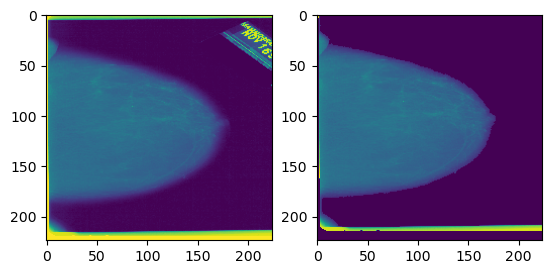

8340_DDSM.png


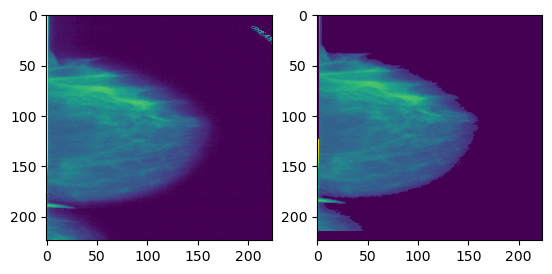

3750_DDSM.png


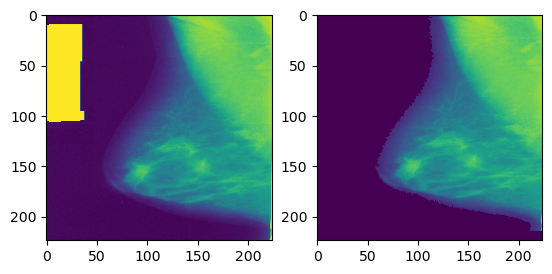

4866_DDSM.png


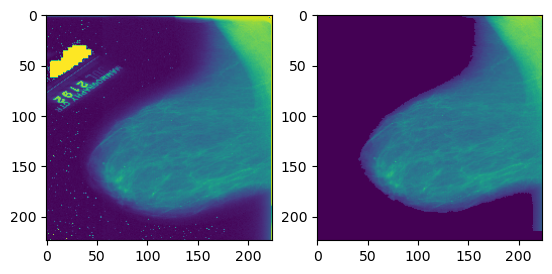

1302_DDSM.png


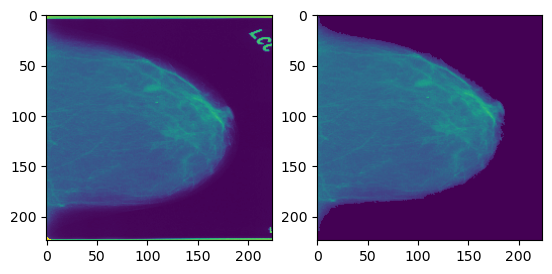

7854_DDSM.png


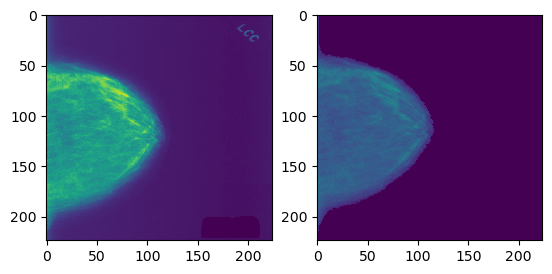

8472_DDSM.png


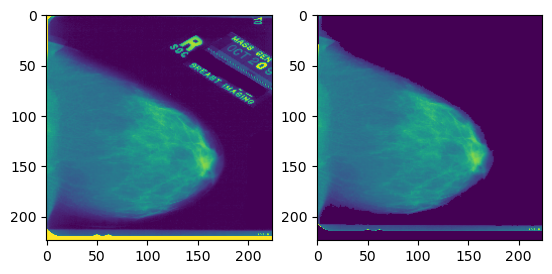

9660_DDSM.png


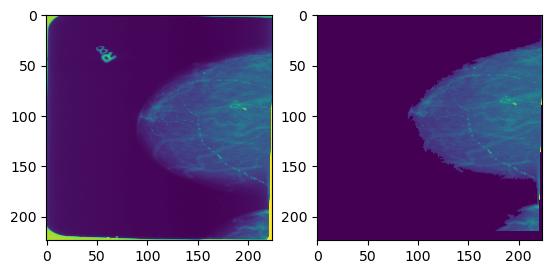

4926_DDSM.png


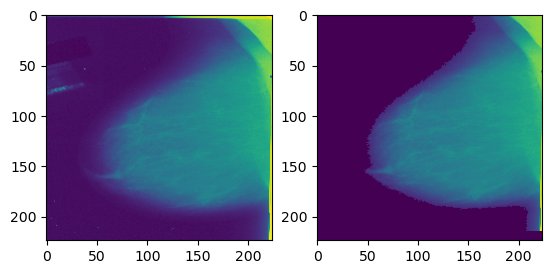

9804_DDSM.png


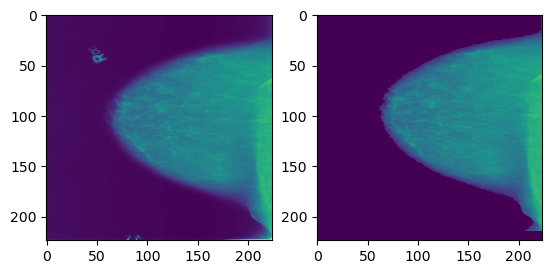

7224_DDSM.png


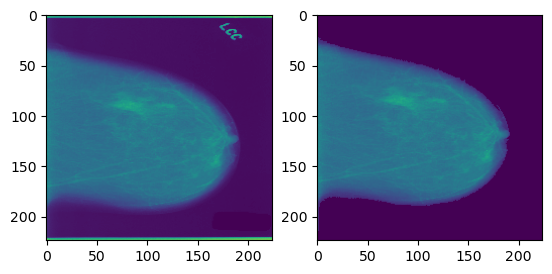

10146_DDSM.png


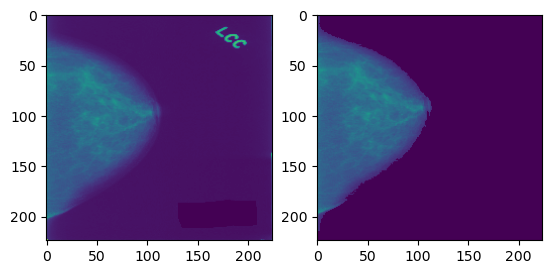

9342_DDSM.png


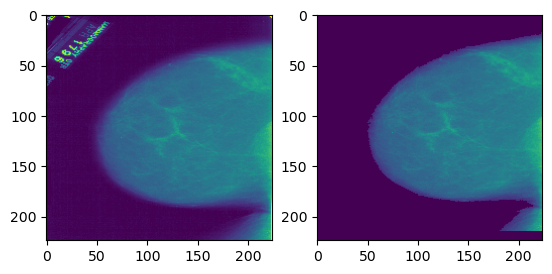

4950_DDSM.png


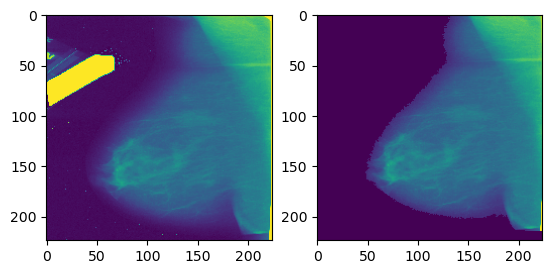

8010_DDSM.png


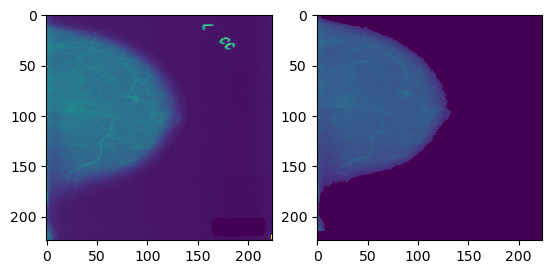

324_DDSM.png


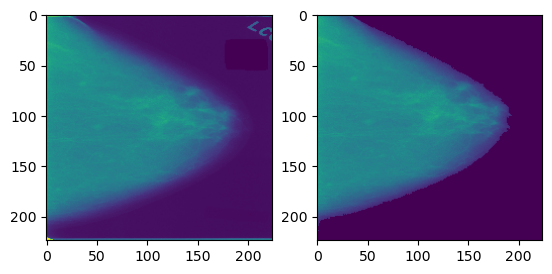

7560_DDSM.png


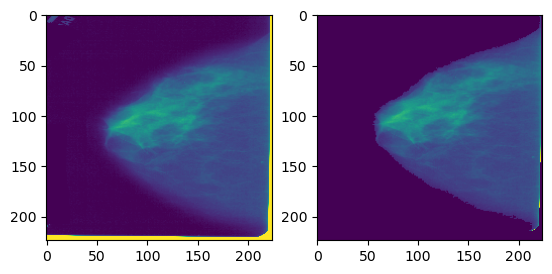

6366_DDSM.png


KeyboardInterrupt: 

In [46]:
i=0
for root, _ , files in os.walk(os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_four_classes')):
    for file in files:
            if file.endswith(".png"):
                img = image.imread(os.path.join(root,file))
                print(file)
                segmented = breast_segment.segment_breast(img,30)
                f, axarr = plt.subplots(1,2)
                axarr[0].imshow(img)
                axarr[1].imshow(segmented, vmax = 1)
                plt.show()
                i+=1